# Emotion Sensor Project

In this project I plan on using sentiment analysis and Naive Bayes classifier. 

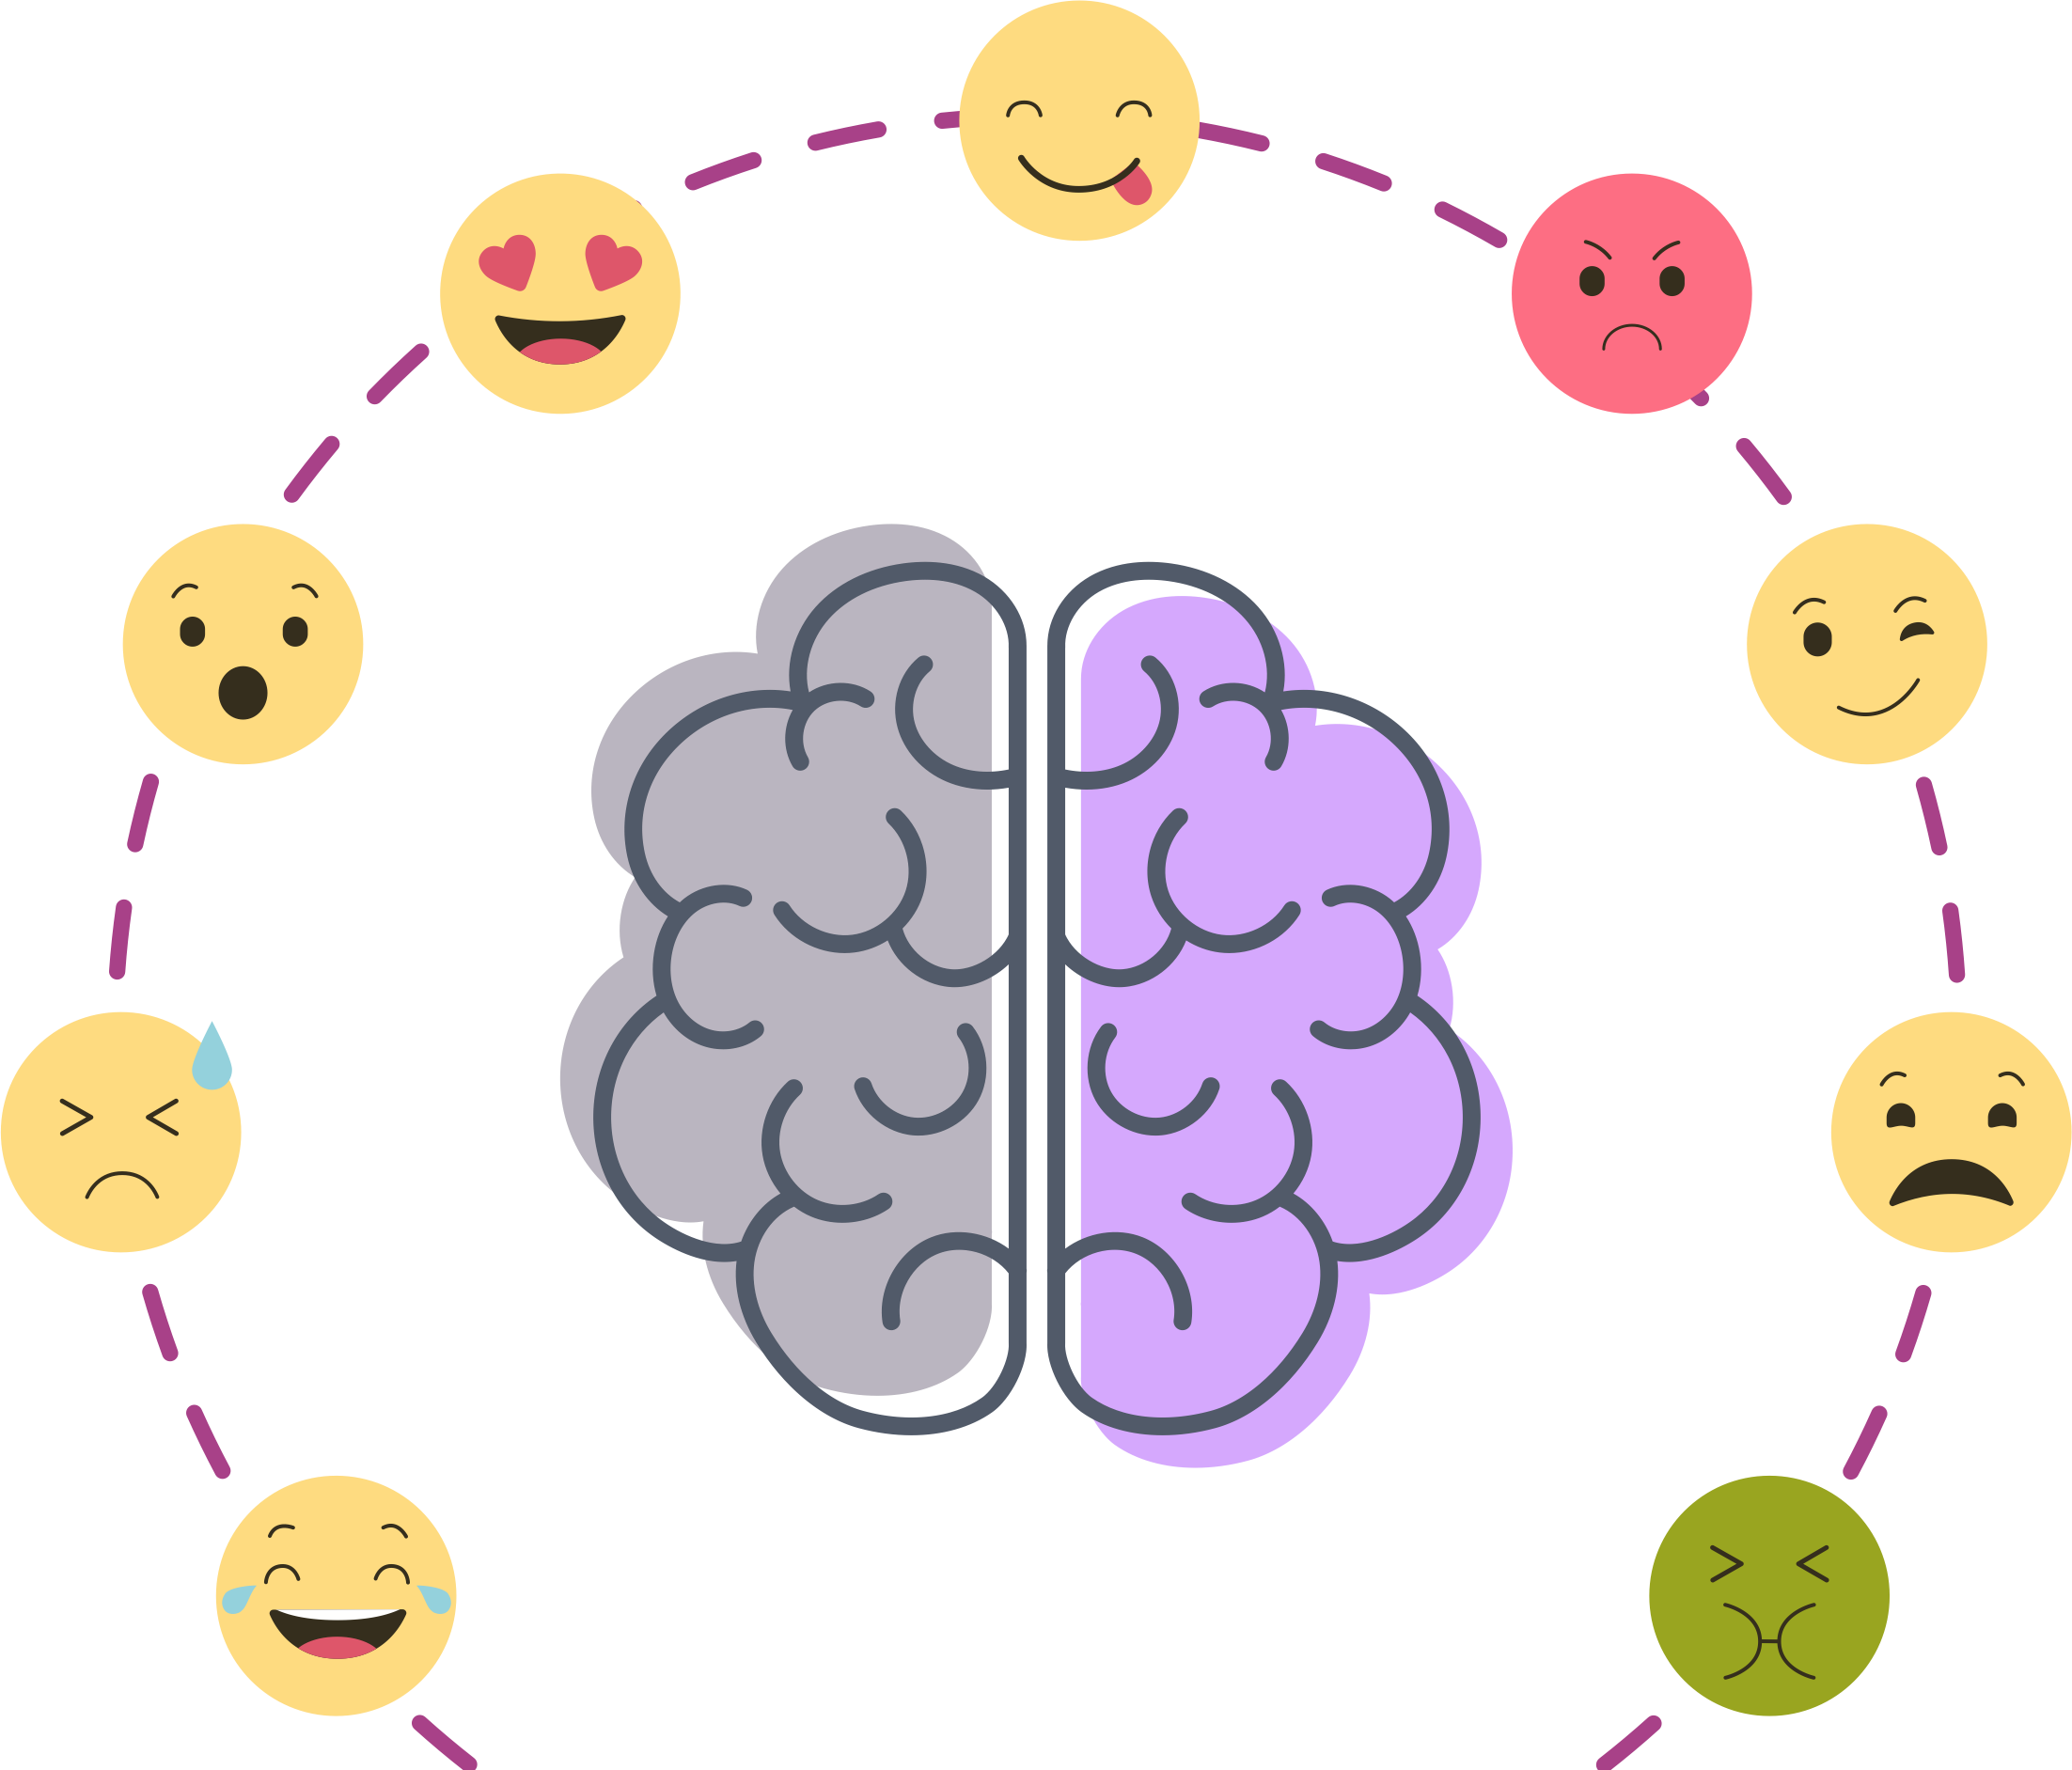

About the data set: 
Link --> https://www.kaggle.com/iwilldoit/emotions-sensor-data-set

The data set includes 23000 english words, taken from tweets, blogs, and other social media posts. Each word has 7 columns following it, each named by 7 basic emotions. The emotions are Disgust, Surprise, Neutral ,Anger ,Sad ,Happy and Fear and under each category, is the probability of that word being used in that emotional context. 

Why is sentiment analysis so important? Sentiment analysis solves a number of genuine business problems:

    - It helps to predict customer behavior for a particular product.
   -  It can help to test the adaptability of a product.
   -  Automates the task of customer preference reports.
   -  It can easily automate the process of determining how well did a movie run by analyzing the sentiments behind the movie's reviews from a number of platforms.
   -  And many more!
   
Information from Link --> https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python
 


Citations: (These links helped me in the process of developing my project) 

    -https://www.kaggle.com/iwilldoit/emotions-sensor-data-set
    -https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python
    -https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e
    -https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948
    -https://www.oreilly.com/learning/perform-sentiment-analysis-with-lstms-using-tensorflow
    -https://www.pythonforengineers.com/build-a-sentiment-analysis-app-with-movie-reviews/
    -https://www.dataquest.io/blog/basic-statistics-in-python-probability/

    

In [1]:
#Importing libraries and packages: 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import operator
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [2]:
#I will first import the data set and give it a name: 
data = pd.read_csv('../AI Final project/Andbrain_DataSet.csv')
data.dataframeName = 'Andbrain_DataSet.csv'


Now I want to have my program only read a limited amount of rows, because 23000 is a lot and will take a long time to run: 

In [3]:
#I will have it read the first 500 rows:
nRowsRead = 500
data = pd.read_csv('../AI Final project/Andbrain_DataSet.csv', delimiter=',', nrows = nRowsRead)
data.dataframeName = 'Andbrain_DataSet.csv'
nRow, nCol = data.shape  # this will count rows and columns
#this should give me: "There are 500 rows and 8 columns"
print(f'There are {nRow} rows and {nCol} columns')

There are 500 rows and 8 columns


I want to run basic code to read the data, I want to make sure I can see everything in the data set. 

In [5]:
#Lets take a look at the first 5 rows
data.head(5)

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346


In [6]:
#Looks at the last 5 rows in the data set
data.tail(5)

,word,disgust,surprise,neutral,anger,sad,happy,fear
495,hits,0.004762,0.071429,0.004762,0.014286,0.033333,0.033333,0.004762
496,hiv,0.017857,0.053571,0.017857,0.017857,0.053571,0.017857,0.053571
497,hold,0.002463,0.025123,0.000493,0.026108,0.032020,0.028079,0.031034
498,hole,0.006696,0.042411,0.002232,0.029018,0.015625,0.033482,0.024554
499,holiday,0.008366,0.022523,0.000644,0.027671,0.018662,0.045689,0.022523


In [7]:
#More details about the data set values
data.info

<bound method DataFrame.info of                word   disgust  surprise   neutral     anger       sad  \
0          ability   0.004464  0.047832  0.000638  0.023597  0.013393   
1             able   0.000017  0.000182  0.000409  0.000176  0.000219   
2            abuse   0.000532  0.000177  0.000177  0.137363  0.001241   
3          academy   0.007143  0.021429  0.007143  0.007143  0.007143   
4           accept   0.008271  0.006767  0.000752  0.048872  0.018797   
5       acceptance   0.002747  0.008242  0.002747  0.013736  0.024725   
6       accounting   0.017857  0.017857  0.017857  0.017857  0.053571   
7         accuracy   0.035714  0.107143  0.035714  0.035714  0.035714   
8          achieve   0.001382  0.004147  0.000461  0.005069  0.006912   
9             acid   0.017857  0.017857  0.017857  0.017857  0.125000   
10          active   0.002381  0.035714  0.002381  0.026190  0.050000   
11      activities   0.000003  0.000035  0.001262  0.000047  0.000060   
12          adding 

In [8]:
#List all the column names to see categories or emotions:
emotions = data.columns
emotions

Index(['word', 'disgust', 'surprise', 'neutral', 'anger', 'sad', 'happy',
       'fear'],
      dtype='object')

# Statistical Data of each emotion

The reason why I did this was because I was curious to see the sum, mean, std, minumum value, maximum value of each category or emotion. This information can help me when I decide to run the Naive Bayes classifier algorithm. 

# Overall sum of each emotion:

In [9]:
#This will only find the sum of the first 500 rows, 
#because as mentioned before, I set the limit of rows to first 500.
Happy_sum = data['happy'].sum()
print("Happy Sum:" , Happy_sum)

sad_sum = data['sad'].sum()
print("Sad Sum:" , sad_sum)

disgust_sum = data['disgust'].sum()
print("Disgust Sum:" , disgust_sum)

surprise_sum = data['surprise'].sum()
print("Surprise Sum:" , surprise_sum)

neutral_sum = data['neutral'].sum()
print("Neutral Sum:" , neutral_sum)

anger_sum = data['anger'].sum()
print("Anger Sum:" , anger_sum)

fear_sum = data['fear'].sum()
print("Fear Sum:" , fear_sum)

Happy Sum: 16.4187133147364
Sad Sum: 13.5459473791624
Disgust Sum: 5.952268204268
Surprise Sum: 15.9835914266599
Neutral Sum: 3.992558905356
Anger Sum: 14.427940308911602
Fear Sum: 15.499657040994899


# Summary Stats per emotion:

1. Happy:

In [10]:
Happy_describe = data['happy'].describe()
print("Happy description:" , Happy_describe)

Happy description: count    500.000000
mean       0.032837
std        0.026746
min        0.000003
25%        0.015267
50%        0.027473
75%        0.040191
max        0.137363
Name: happy, dtype: float64


In [20]:
#This will list all the words in my data and only show 
#their happy probability value:
#I did this just to simply view my data on a narrow scale.
#I will be doing this for all the emotions!
data[["word","happy"]]

,word,happy
0,ability,0.015944
1,able,0.000244
2,abuse,0.001595
3,academy,0.092857
4,accept,0.024812
5,acceptance,0.090659
6,accounting,0.089286
7,accuracy,0.035714
8,achieve,0.122120
9,acid,0.017857


2. Sad

In [12]:
sad_describe = data['sad'].describe()
print("Sad description:" , sad_describe)

Sad description: count    500.000000
mean       0.027092
std        0.022845
min        0.000003
25%        0.011905
50%        0.021639
75%        0.035714
max        0.125000
Name: sad, dtype: float64


In [13]:
data[["word","sad"]]

,word,sad
0,ability,0.013393
1,able,0.000219
2,abuse,0.001241
3,academy,0.007143
4,accept,0.018797
5,acceptance,0.024725
6,accounting,0.053571
7,accuracy,0.035714
8,achieve,0.006912
9,acid,0.125000


3. Disgust

In [14]:
disgust_describe = data['disgust'].describe()
print("Disgust description:" , disgust_describe)

Disgust description: count    500.000000
mean       0.011905
std        0.013392
min        0.000002
25%        0.002286
50%        0.007143
75%        0.017857
max        0.086735
Name: disgust, dtype: float64


In [15]:
data[["word","disgust"]]

,word,disgust
0,ability,0.004464
1,able,0.000017
2,abuse,0.000532
3,academy,0.007143
4,accept,0.008271
5,acceptance,0.002747
6,accounting,0.017857
7,accuracy,0.035714
8,achieve,0.001382
9,acid,0.017857


4. Neutral

In [16]:
neutral_describe = data['neutral'].describe()
print("Neutral description:" , neutral_describe)

Neutral description: count    500.000000
mean       0.007985
std        0.010177
min        0.000032
25%        0.000970
50%        0.003401
75%        0.010204
max        0.035714
Name: neutral, dtype: float64


In [17]:
data[["word","neutral"]]

,word,neutral
0,ability,0.000638
1,able,0.000409
2,abuse,0.000177
3,academy,0.007143
4,accept,0.000752
5,acceptance,0.002747
6,accounting,0.017857
7,accuracy,0.035714
8,achieve,0.000461
9,acid,0.017857


5. Fear

In [18]:
fear_describe = data['fear'].describe()
print("Fear description:" , fear_describe)

Fear description: count    500.000000
mean       0.030999
std        0.025993
min        0.000004
25%        0.014182
50%        0.025510
75%        0.036957
max        0.140188
Name: fear, dtype: float64


In [19]:
data[["word","fear"]]

,word,fear
0,ability,0.040179
1,able,0.000186
2,abuse,0.002659
3,academy,0.035714
4,accept,0.038346
5,acceptance,0.013736
6,accounting,0.017857
7,accuracy,0.035714
8,achieve,0.005069
9,acid,0.017857


6. Surprise

In [22]:
surprise_describe = data['surprise'].describe()
print("Surprise description:" , surprise_describe)

Surprise description: count    500.000000
mean       0.031967
std        0.024712
min        0.000003
25%        0.016440
50%        0.026786
75%        0.042437
max        0.135056
Name: surprise, dtype: float64


In [23]:
data[["word","surprise"]]

,word,surprise
0,ability,0.047832
1,able,0.000182
2,abuse,0.000177
3,academy,0.021429
4,accept,0.006767
5,acceptance,0.008242
6,accounting,0.017857
7,accuracy,0.107143
8,achieve,0.004147
9,acid,0.017857


7. Anger

In [24]:
anger_describe = data['anger'].describe()
print("Anger description:" , anger_describe)

Anger description: count    500.000000
mean       0.028856
std        0.025090
min        0.000003
25%        0.011905
50%        0.023810
75%        0.035714
max        0.137363
Name: anger, dtype: float64


In [25]:
data[["word","anger"]]

,word,anger
0,ability,0.023597
1,able,0.000176
2,abuse,0.137363
3,academy,0.007143
4,accept,0.048872
5,acceptance,0.013736
6,accounting,0.017857
7,accuracy,0.035714
8,achieve,0.005069
9,acid,0.017857


# Training My Data: 

I used a github project code to help me set up my training and testing data! 

Link: https://github.com/kdimatteo/Emotiscrape/blob/master/emotiscrape.py

In [5]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
train, test = train_test_split(data,test_size = 0.1)

In [6]:
#based on mean of each emotion found above
#I chose the mean because it made sense to me to choose the overall value rather than a max or a min. 
train_happy = train[train['happy'] > 0.033675] 
train_happy = train_happy['word']

train_sad = train[train['sad'] > 0.027074] 
train_sad = train_sad['word']

train_dis = train[train['disgust'] > 0.012838] 
train_dis = train_dis['word']

train_n = train[train['neutral'] > 0.008192] 
train_n = train_n['word']

train_f = train[train['fear'] > 0.030523] 
train_f = train_f['word']

train_sur = train[train['surprise'] > 0.032679] 
train_sur = train_sur['word']

train_a = train[train['anger'] > 0.028235] 
train_a = train_a['word']

In [62]:
print("train_happy", train_happy.shape)
print("train_sad", train_sad.shape)
print("train_dis", train_dis.shape)
print("train_n", train_n.shape)
print("train_f", train_f.shape)
print("train_sur", train_sur.shape)
print("train_a", train_a.shape)
print()

train_happy (184,)
train_sad (167,)
train_dis (146,)
train_n (141,)
train_f (177,)
train_sur (168,)
train_a (192,)



In [13]:
words = data.word.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 500


# Having Fun W/ Visualizations:

# Wordclouds!

I chose wordclouds as one of the ways I wanted to visualize my data because - one they are cool to look at, and second, it is an easier way to analyze text. For example, if you are testing for frequency, you would look at the words that are larger and bolder in the cloud. 

Link --> https://www.surveygizmo.com/resources/blog/qualitative-data-word-cloud/

In [30]:
#Importing functions to help build the word clouds:
#Link --> https://medium.com/@tanmayee92/visualizing-youtube-videos-using-seaborn-and-wordcloud-in-python-b24247f70228
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output

In [31]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Happy words


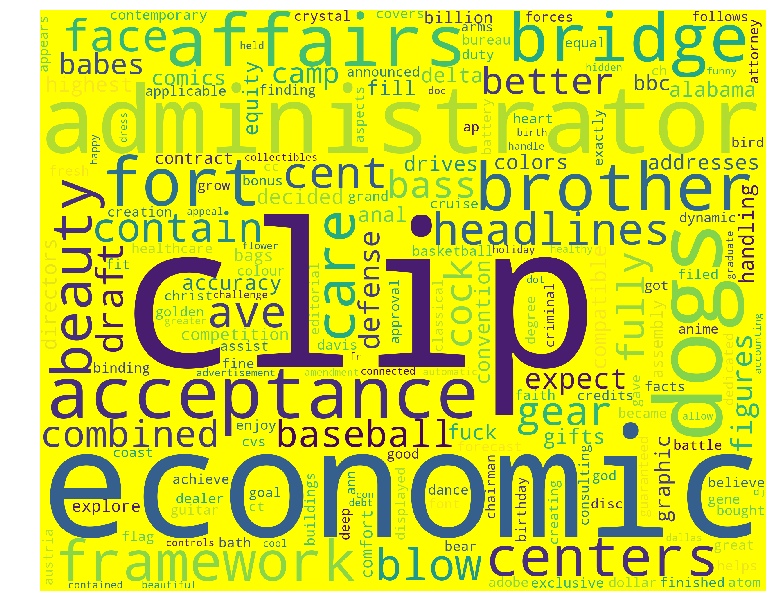

In [43]:
#This will print all the training words and their frequency under the 
#happy category
print("Happy words")
wordcloud_draw(train_happy,'yellow')
#I chose yellow because yellow is usually associated with the happy emotion.

Sad words


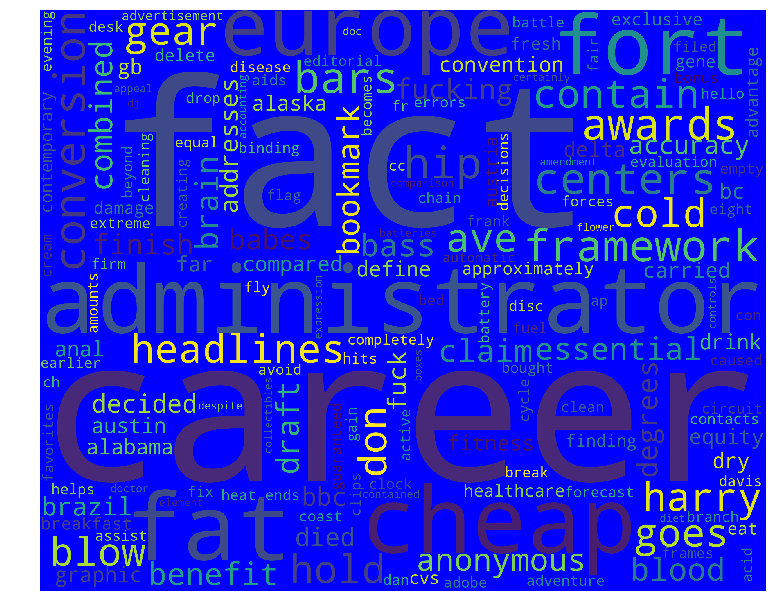

In [33]:
print("Sad words")
wordcloud_draw(train_sad, 'blue')
#I chose blue because Blue is usually used for the sad emotion.

Angry words


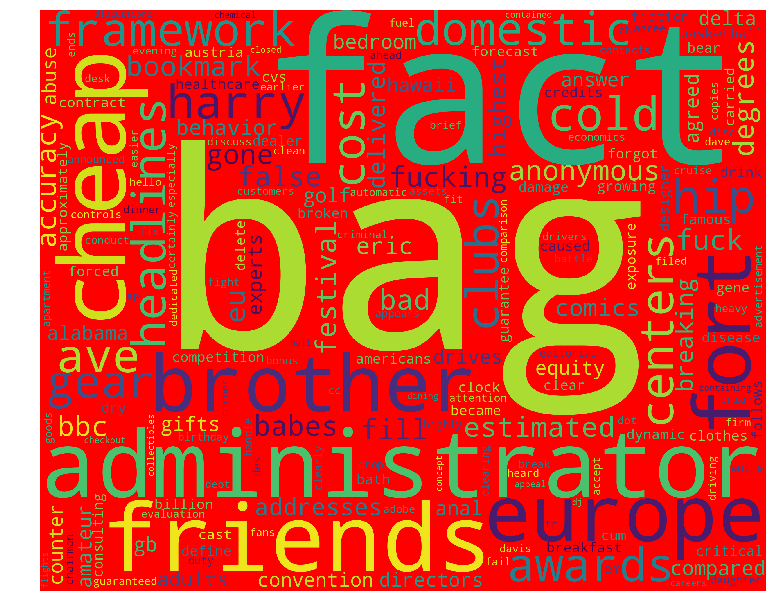

In [34]:
print("Angry words")
wordcloud_draw(train_a, 'red')
#Red usually symbolizes anger.

Fear words


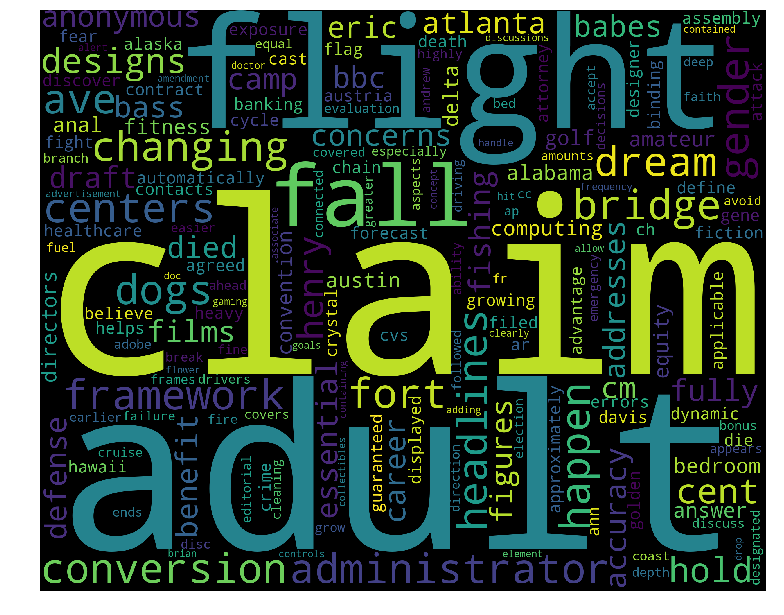

In [35]:
print("Fear words")
wordcloud_draw(train_f, 'black')
#Black usually means something scary, aka fear

Neutral words


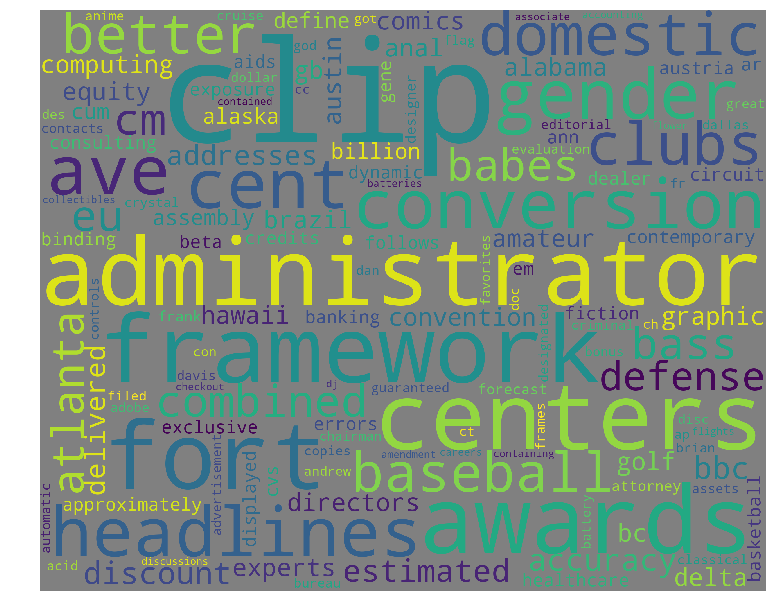

In [36]:
print("Neutral words")
wordcloud_draw(train_n, 'grey')
#I chose grey because its not any particular spectrum of emotions but rather no emotion at all. 

Disgusted words


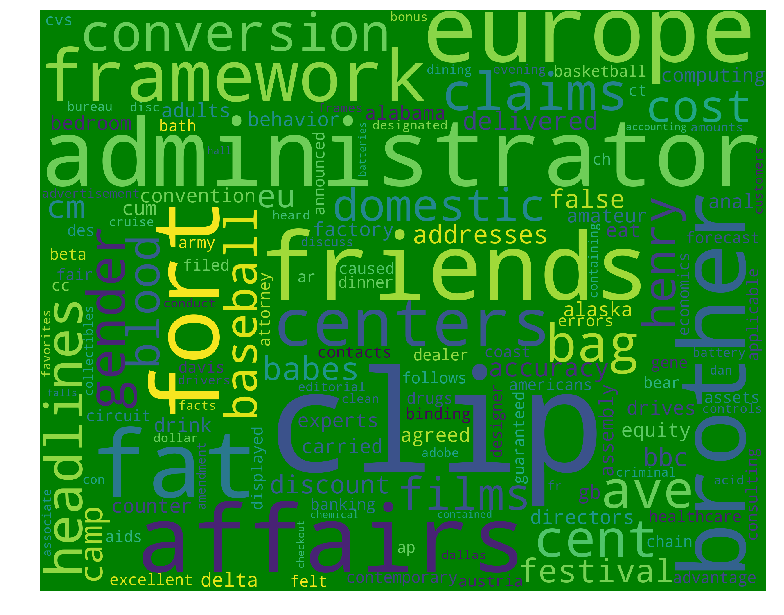

In [37]:
print("Disgusted words")
wordcloud_draw(train_dis, 'green')
#Green is used to display disgust

Surprise words


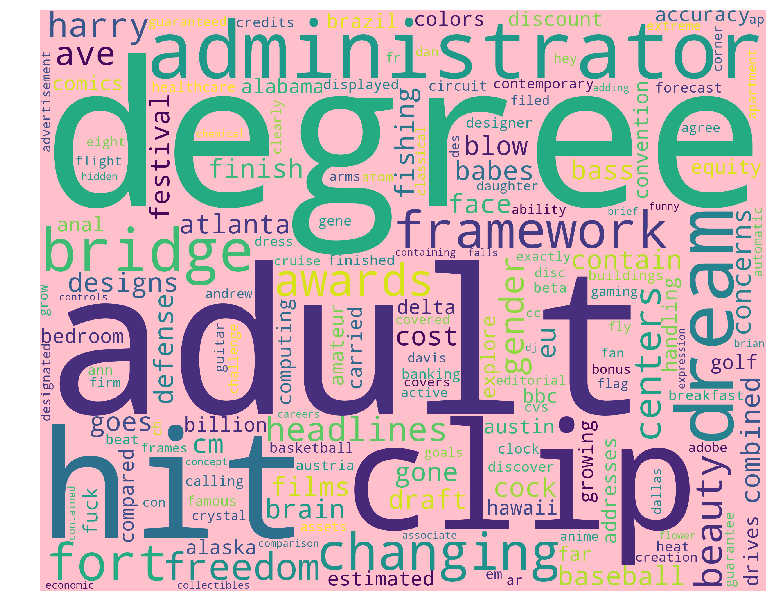

In [42]:
print("Surprise words")
wordcloud_draw(train_sur,'pink' )
#surprise could be sybmolized by any color, so I just chose pink.


# Testing My Data:

In [67]:
words = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.word.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words.append((words_without_stopwords, row.happy))


for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.word.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words.append((words_without_stopwords, row.sad))

    
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.word.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words.append((words_without_stopwords, row.anger))
    
    
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.word.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@'
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words.append((words_without_stopwords, row.neutral))
    
    
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.word.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words.append((words_without_stopwords, row.surprise))
    
    
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.word.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words.append((words_without_stopwords, row.fear))
    
    
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.word.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words.append((words_without_stopwords, row.disgust))

SyntaxError: invalid syntax (<ipython-input-67-b340bf6bfb4c>, line 43)

In [68]:
#also based on mean of each emotion found above
#I chose the mean because it made sense to me to chose the overall value rather than a max or a min. 
test_happy = test[test['happy'] > 0.033675] 
test_happy = test_happy['word']

test_sad = test[test['sad'] > 0.027074] 
test_sad = test_sad['word']

test_dis = test[test['disgust'] > 0.012838] 
test_dis = test_dis['word']

test_n = test[test['neutral'] > 0.008192] 
test_n = test_n['word']

test_f = test[test['fear'] > 0.030523] 
test_f = test_f['word']

test_sur = test[test['surprise'] > 0.032679] 
test_sur = test_sur['word']

test_a = test[test['anger'] > 0.028235] 
test_a = test_a['word']

In [48]:
def get_words_in_word(words):
    all = []
    for (words, sentiment) in words:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_word(words))

In [49]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Help from: https://github.com/kdimatteo/Emotiscrape/blob/master/emotiscrape.py

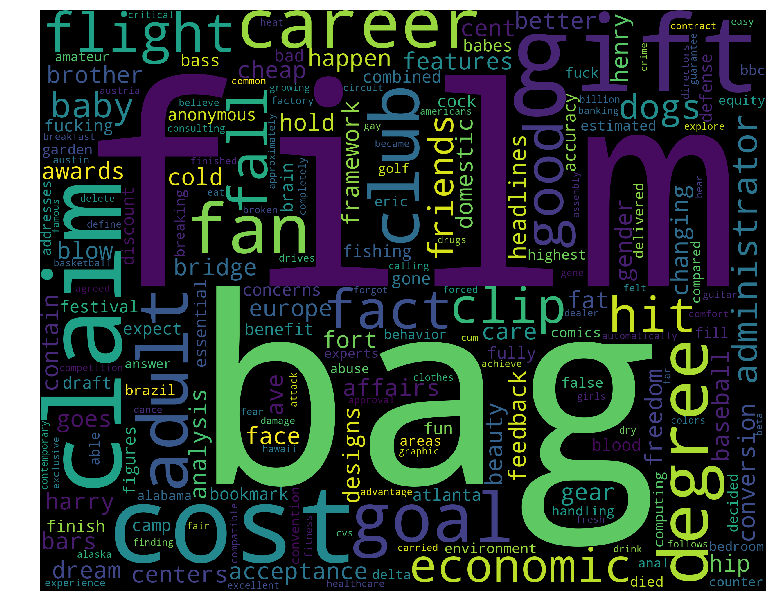

In [50]:
#Word cloud using testing data 
wordcloud_draw(w_features)

# Training the Naive Bayes Classifier

As mentioned in the beginning of this project, I want to classify each emotion by using the Naive Bayes Classifier. I found a really helpful link that taught me how to do it and how it works! 


Link --> https://github.com/victorneo/Twitter-Sentimental-Analysis/blob/master/classification.


Link --> https://www.kaggle.com/ryankopa/python-nltk-sentiment-analysis

In [51]:
training_set = nltk.classify.apply_features(extract_features,words)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [52]:
happy_cnt = 0
sad_cnt = 0
fear_cnt = 0
disgust_cnt = 0
anger_cnt = 0
surprise_cnt = 0
neutral_cnt = 0
for obj in test_happy: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'happy'): 
        happy_cnt = happy_cnt + 1

In [53]:
for obj in test_sad: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'sad'): 
        sad_cnt = sad_cnt + 1

In [54]:
for obj in test_sad: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'sad'): 
        sad_cnt = sad_cnt + 1

In [55]:
for obj in test_dis: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'disgust'): 
        disgust_cnt = disgust_cnt + 1

In [56]:
for obj in test_a: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'anger'): 
        anger_cnt = anger_cnt + 1

In [57]:
for obj in test_sur: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'surprise'): 
        surprise_cnt = surprise_cnt + 1

In [58]:
for obj in test_n: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'neutral'): 
        neutral_cnt = neutral_cnt + 1

In [59]:
print('[Happy]: %s/%s '  % (len(test_happy),happy_cnt)) 
print('[Sad]: %s/%s '  % (len(test_sad),sad_cnt))  
print('[Fear]: %s/%s '  % (len(test_f),fear_cnt))  
print('[Disgust]: %s/%s '  % (len(test_dis),disgust_cnt))
print('[Anger]: %s/%s '  % (len(test_a),anger_cnt)) 
print('[Neutral]: %s/%s '  % (len(test_n),neutral_cnt))  
print('[Surprise]: %s/%s '  % (len(test_sur),surprise_cnt))  

[Happy]: 20/0 
[Sad]: 21/0 
[Fear]: 21/0 
[Disgust]: 18/0 
[Anger]: 15/0 
[Neutral]: 18/0 
[Surprise]: 20/0 


To improve the evalutation accuracy, we need something to take the context and references into consideration. Maybe with more research and skill, I can evaluate a new sentence by the probability and predict the emotion behind it.

Top 10  most informative features:

In [60]:
classifier.show_most_informative_features(10)

Most Informative Features
        contains(active) = True           0.0261 : 0.0357 =    150.0 : 1.0
          contains(fair) = True           0.0185 : 0.0357 =    135.0 : 1.0
         contains(adult) = True           0.0507 : 0.0357 =    135.0 : 1.0
        contains(gaming) = True           0.0765 : 0.0357 =    135.0 : 1.0
        contains(colors) = True           0.0227 : 0.0357 =    126.0 : 1.0
      contains(compared) = True           0.0281 : 0.0357 =     90.0 : 1.0
         contains(coast) = True           0.0436 : 0.0357 =     90.0 : 1.0
         contains(clean) = True           0.0222 : 0.0357 =     81.0 : 1.0
        contains(closed) = True           0.0005 : 0.0178 =     80.6 : 1.0
      contains(cleaning) = True           0.0292 : 0.0357 =     73.6 : 1.0


# Correlations in the data using Maps

The better the model we need, the more data we need to collect. The more the better. But if we were to just focus on the data that has the most benefit or that matter the most based on the output you are looking for, you can avoid underfitting. One way to do this - based on orielly.com-- "is to narrow the input variables is to identify their influence on the output variables." This is where the concept of correlation maps comes in! "Rather than using all available variables, we want to pick input variables strongly correlated to the output variable for our model." (Orielly.com) 

Link --> https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations


In [61]:
data.corr()

,disgust,surprise,neutral,anger,sad,happy,fear
disgust,1.000000,0.205931,0.610713,0.222347,0.206658,0.056828,0.163169
surprise,0.205931,1.000000,0.380521,-0.002083,0.084813,-0.030767,0.022261
neutral,0.610713,0.380521,1.000000,0.275235,0.363728,0.175809,0.284572
anger,0.222347,-0.002083,0.275235,1.000000,0.009833,-0.118872,-0.060831
sad,0.206658,0.084813,0.363728,0.009833,1.000000,-0.066452,0.044409
happy,0.056828,-0.030767,0.175809,-0.118872,-0.066452,1.000000,-0.148748
fear,0.163169,0.022261,0.284572,-0.060831,0.044409,-0.148748,1.000000


Now lets look at a correlaton map: 

In [71]:
# Limit number of digits:
#Link --> https://datascienceplus.com/visualize-correlation-matrices-in-python/
data.style.background_gradient(cmap='coolwarm').set_precision(2)

The following map (below) is from the kaggle kernal from where I retreived my dataset. I am showing it as another, more accurate, example of a correlation map of my data. I created the one above on my own, but I felt the one created by the owner of the data looks much better and felt that it might help to share!

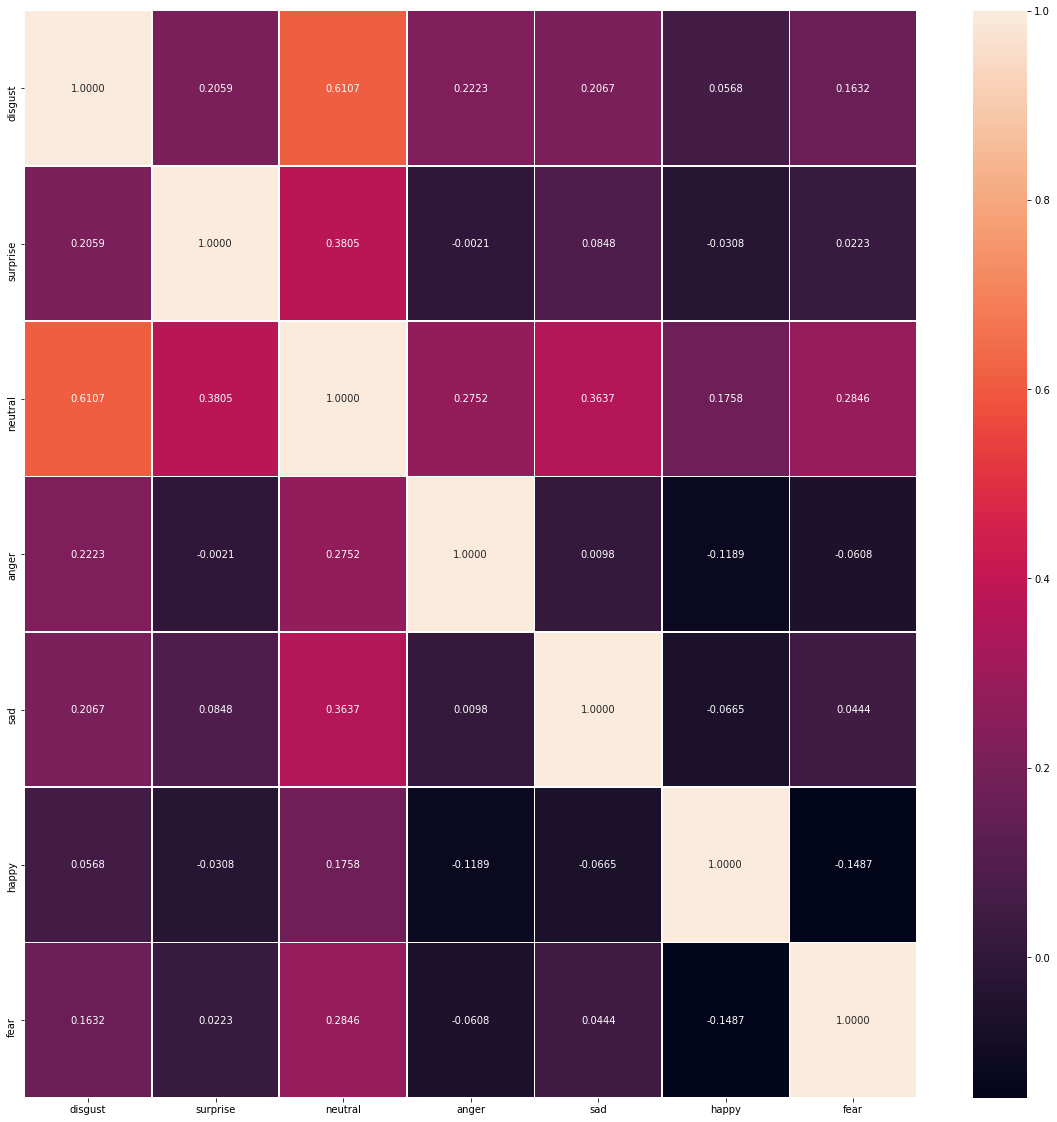

In [73]:
#This segment is from: https://www.kaggle.com/hexmag/emotion-sensor

f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot = True, linewidths = 0.6, fmt = ".4f", ax=ax)
plt.show()

# Emotion 'Sensor':

Here I will be comparing two emotions at a time, to make easier comparisons. 

# Scatter Plots:

Text(0.5,1,'Sad-Happy Scatter Plot')

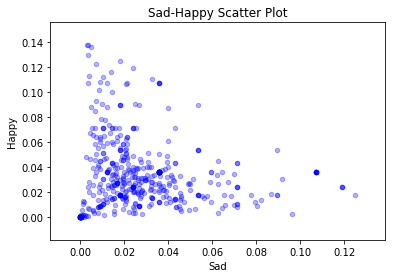

In [77]:
data.plot(kind="scatter",x="sad",y="happy",alpha=.3,color="blue")
plt.xlabel("Sad")
plt.ylabel("Happy")
plt.title("Sad-Happy Scatter Plot")

Text(0.5,1,'Angry-Neutral Scatter Plot')

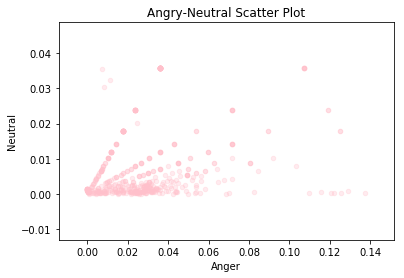

In [86]:
data.plot(kind="scatter",x="anger",y="neutral",alpha=.3,color="pink")
plt.xlabel("Anger")
plt.ylabel("Neutral")
plt.title("Angry-Neutral Scatter Plot")

Text(0.5,1,'Surprise vs Disgust Scatter Plot')

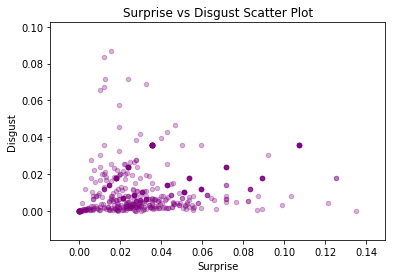

In [87]:
data.plot(kind="scatter",x="surprise",y="disgust",alpha=.3,color="purple")
plt.xlabel("Surprise")
plt.ylabel("Disgust")
plt.title("Surprise vs Disgust Scatter Plot")

Text(0.5,1,'Sad vs Fear Scatter Plot')

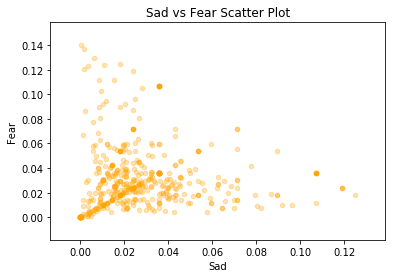

In [88]:
data.plot(kind="scatter",x="sad",y="fear",alpha=.3,color="orange")
plt.xlabel("Sad")
plt.ylabel("Fear")
plt.title("Sad vs Fear Scatter Plot")

# Histogram:

This is important because we can visualize the overall probability of each emotion. I kept the colors the same as the wordclouds. 

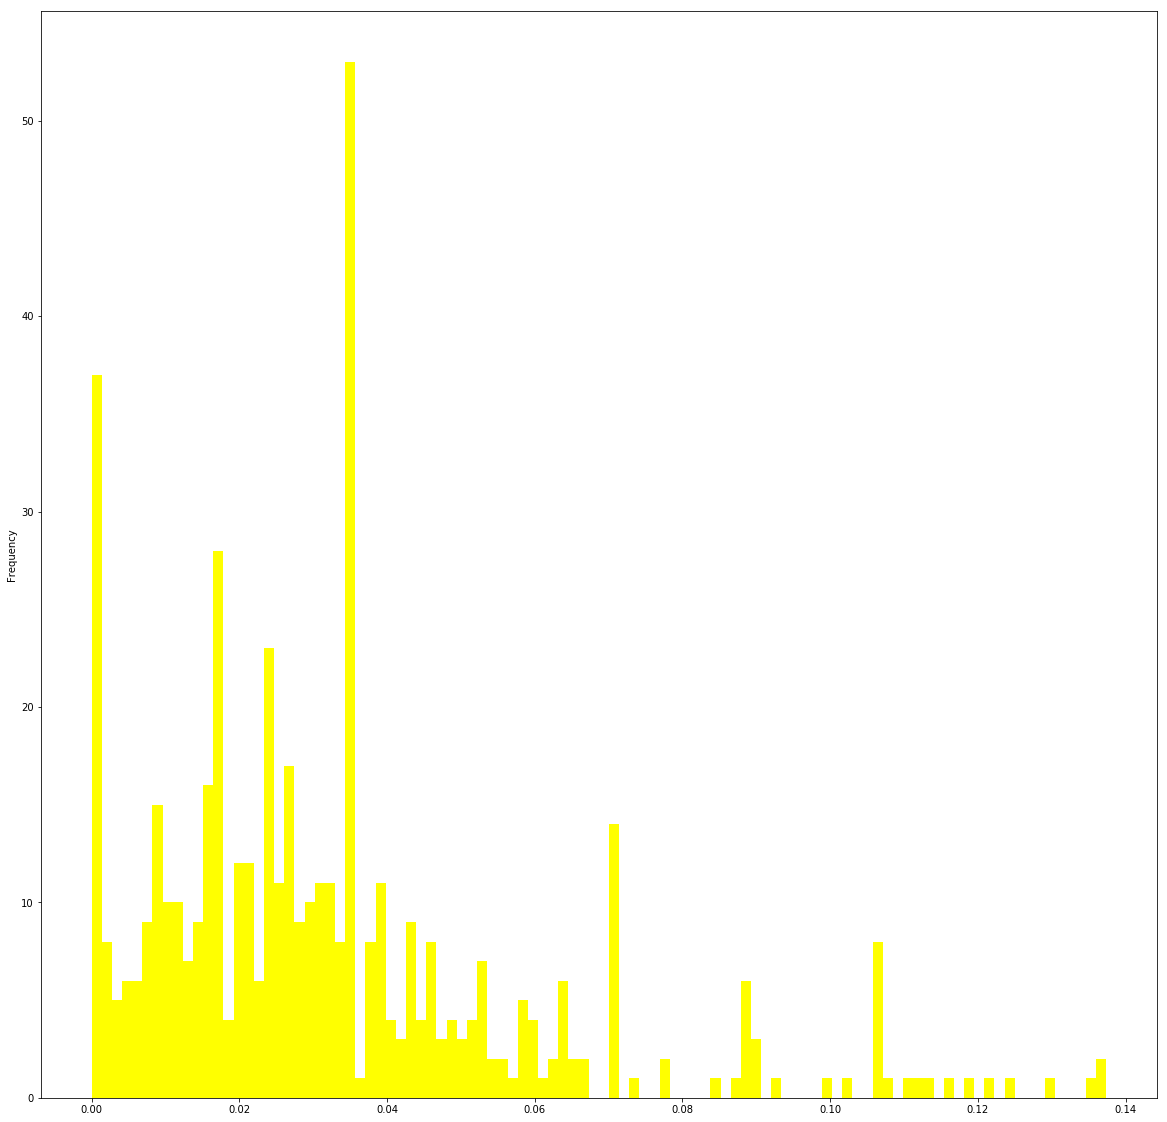

In [89]:
#Happy
data.happy.plot(kind="hist",bins=100,figsize=(20,20), color = "yellow")
plt.show()

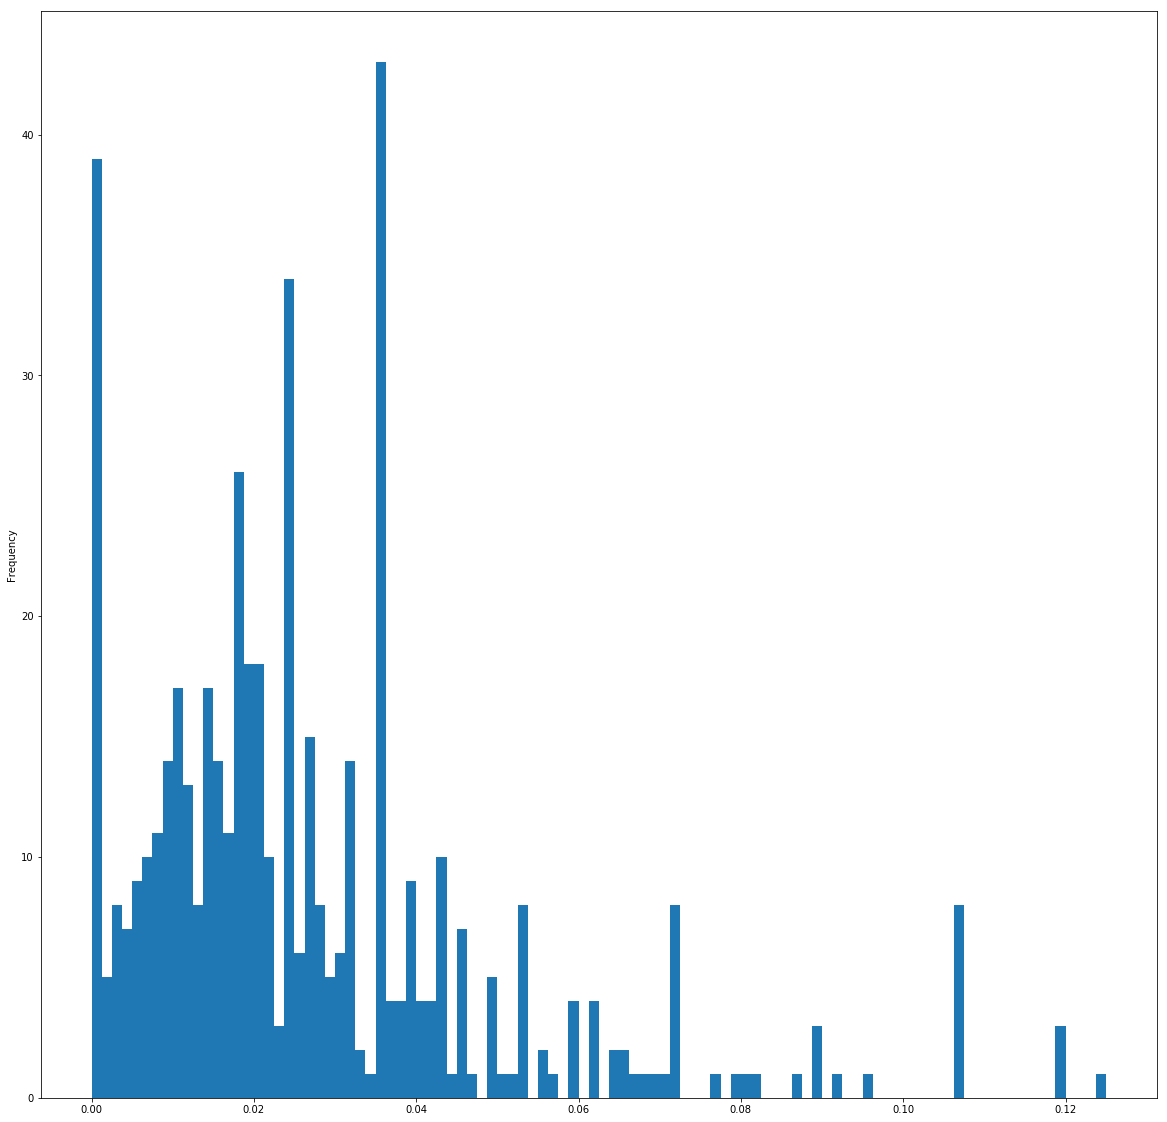

In [90]:
#Sad
data.sad.plot(kind="hist",bins=100,figsize=(20,20))
plt.show()

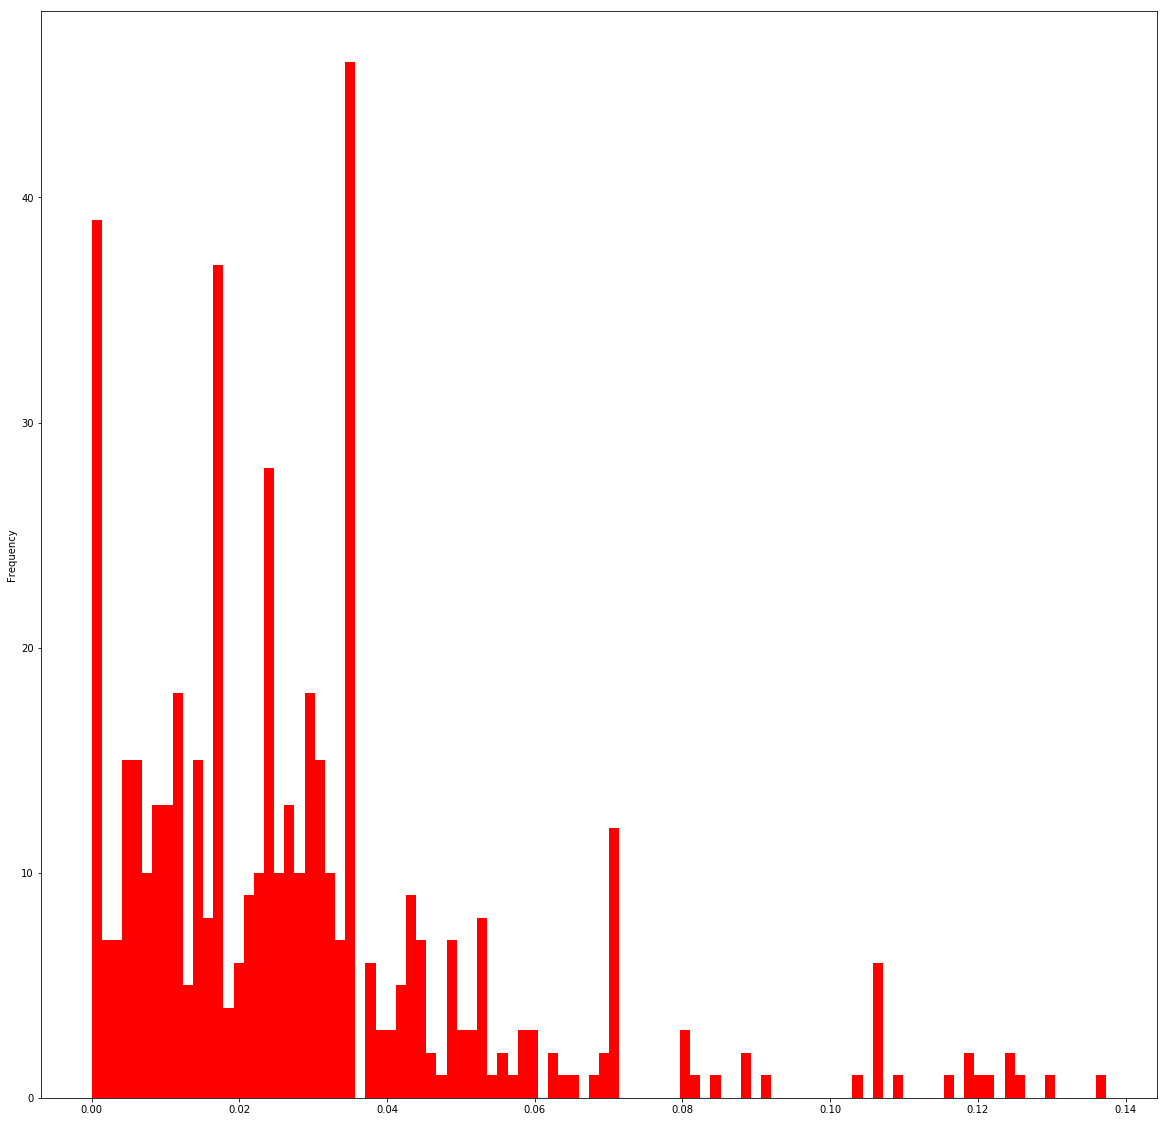

In [91]:
#Anger
data.anger.plot(kind="hist",bins=100,figsize=(20,20), color = "red")
plt.show()

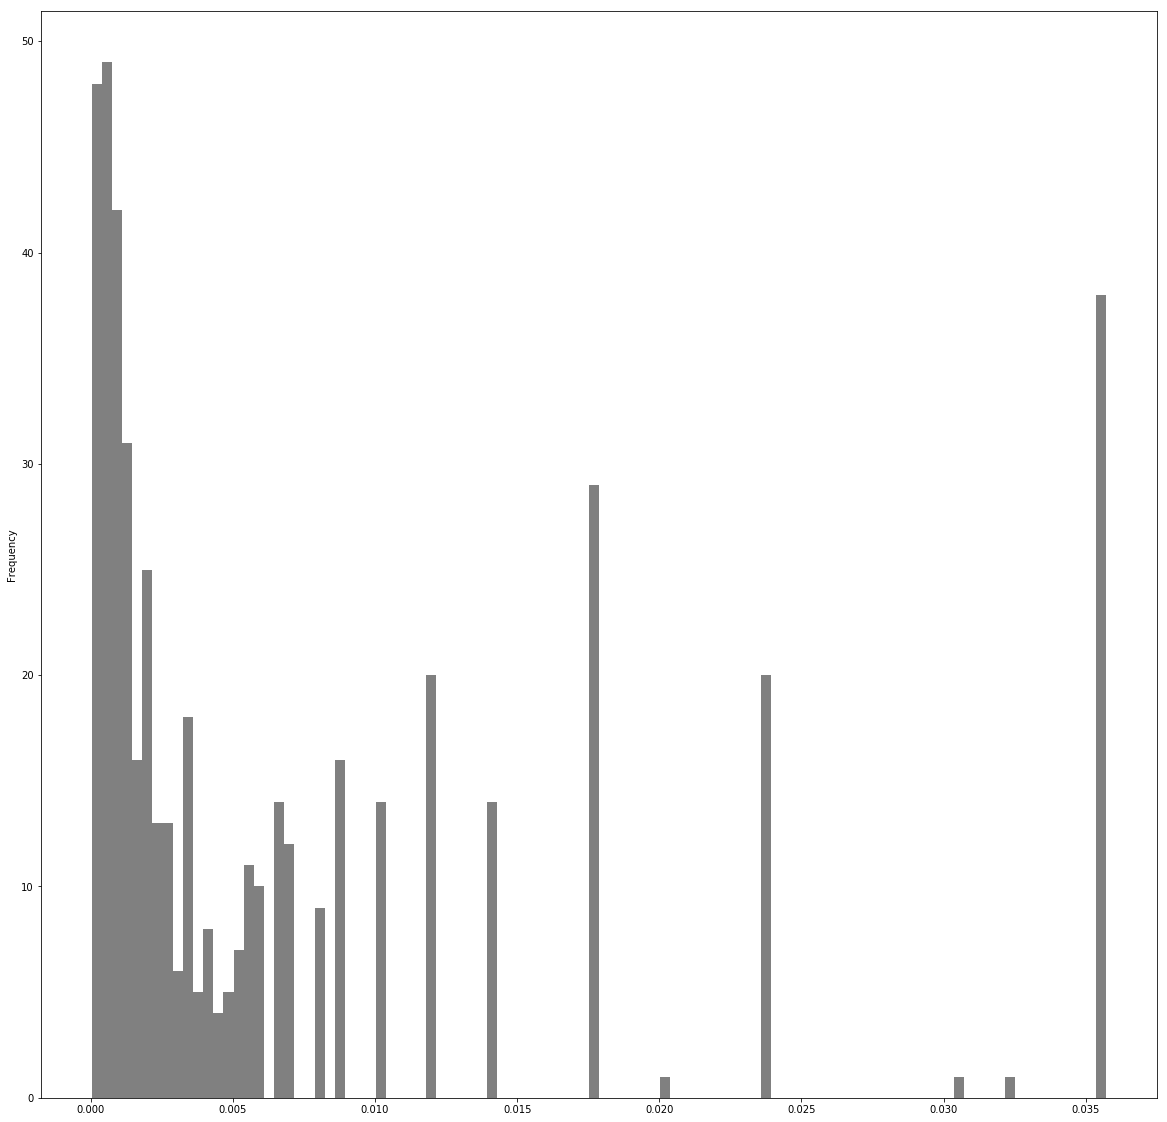

In [94]:
#Neutral
data.neutral.plot(kind="hist",bins=100,figsize=(20,20), color = "grey")
plt.show()

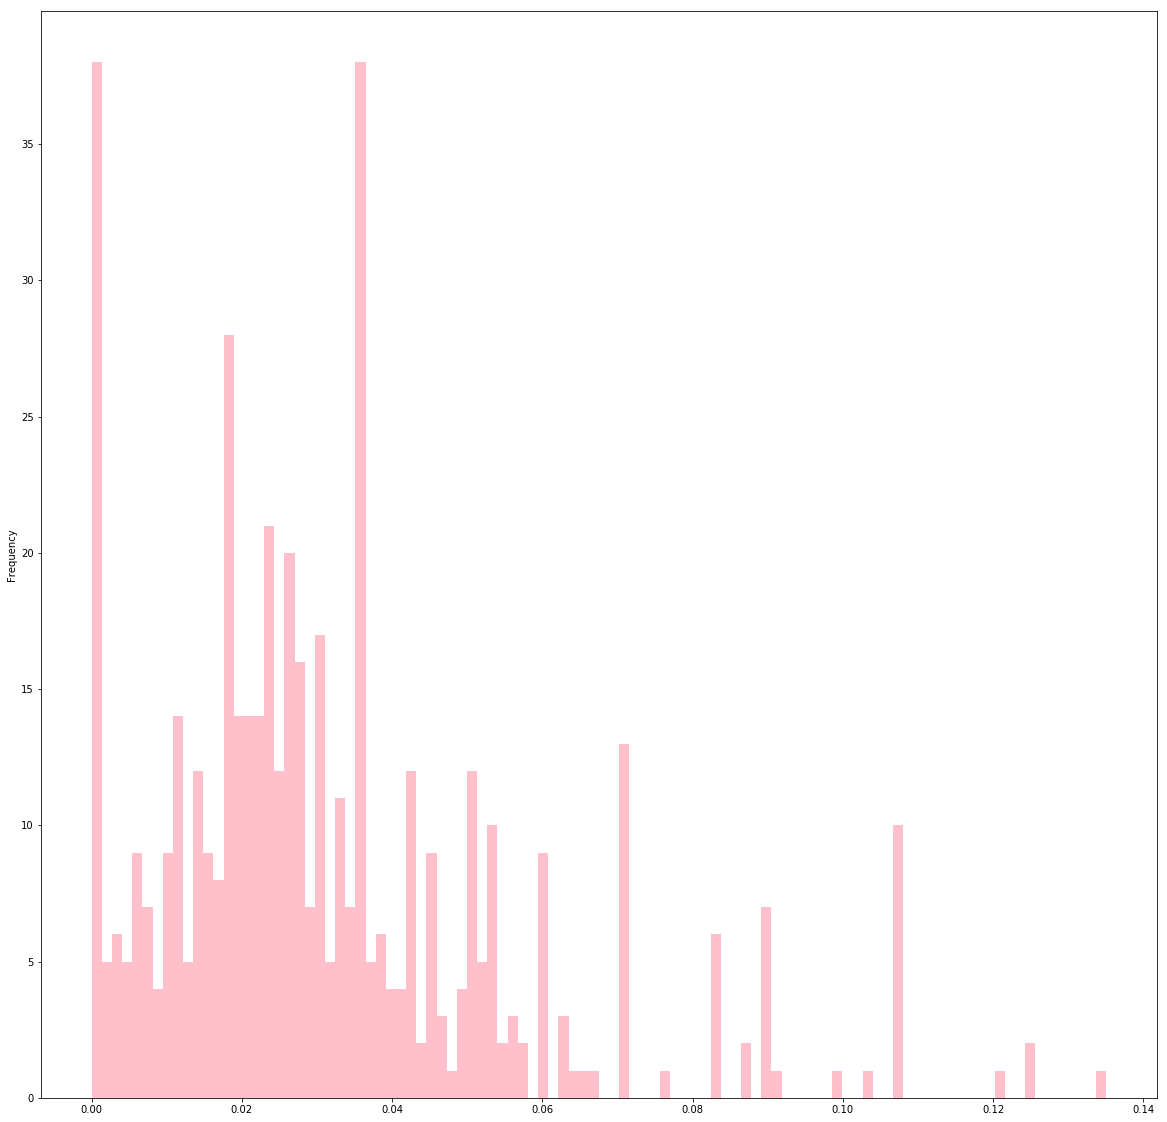

In [93]:
#Surprise
data.surprise.plot(kind="hist",bins=100,figsize=(20,20), color = "pink")
plt.show()

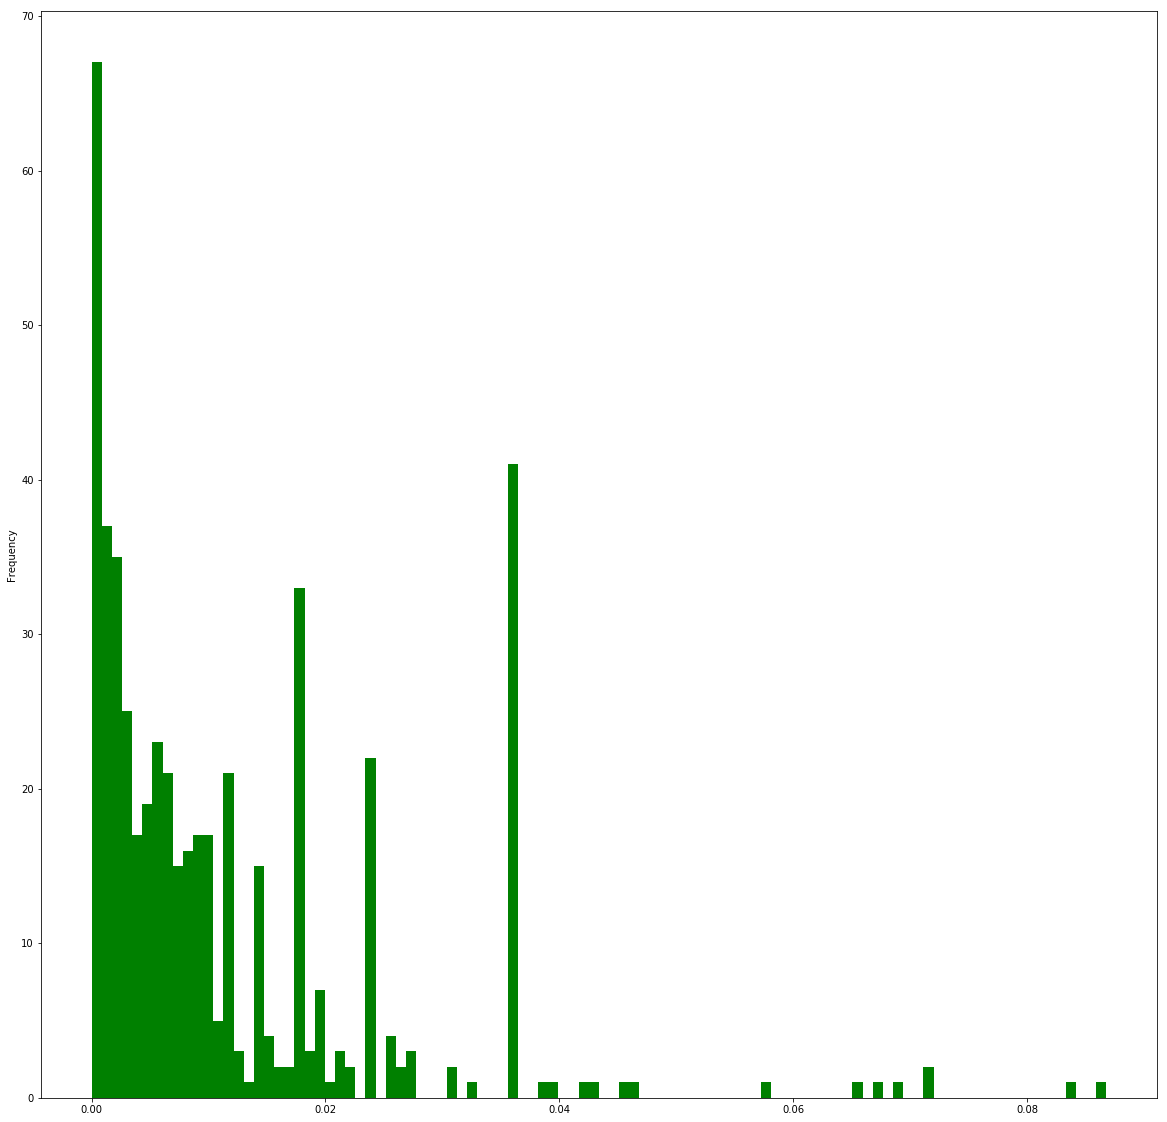

In [95]:
#disgust
data.disgust.plot(kind="hist",bins=100,figsize=(20,20), color = "green")
plt.show()

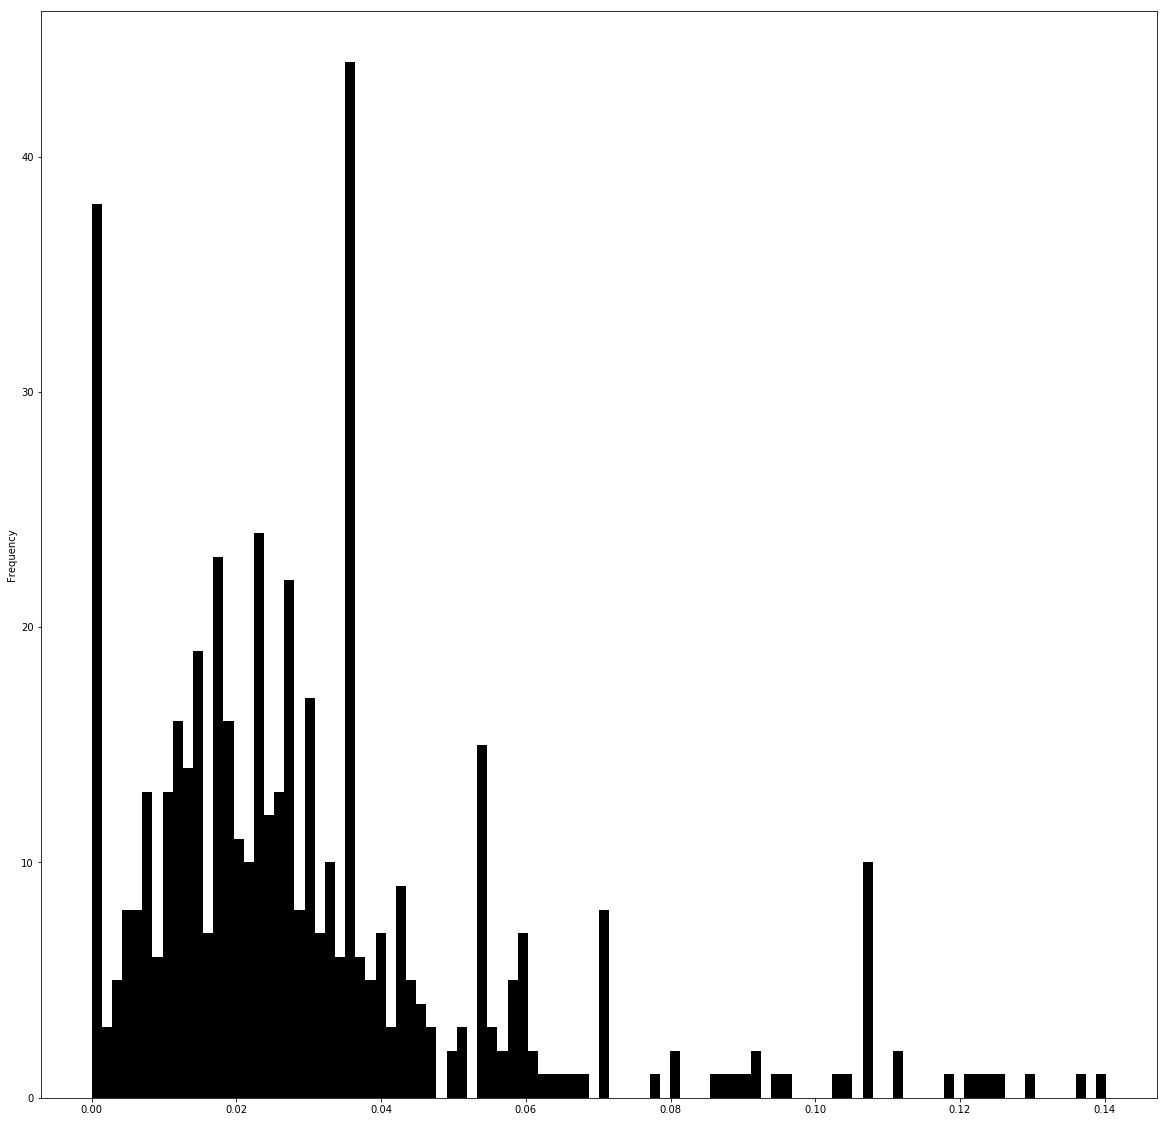

In [96]:
#fear
data.fear.plot(kind="hist",bins=100,figsize=(20,20), color = "black")
plt.show()

# Accuracy

In [10]:
data = data[data.neutral != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['Neutral'] == 'Positive'].size)
print(data[ data['Neutral'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

C:\Users\Faezh Dalieh\Anaconda\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison